Reference: [Link Text](https://dockerlabs.collabnix.com/docker/cheatsheet/#the-docker-cli)

# The Ultimate Docker Cheat Sheet
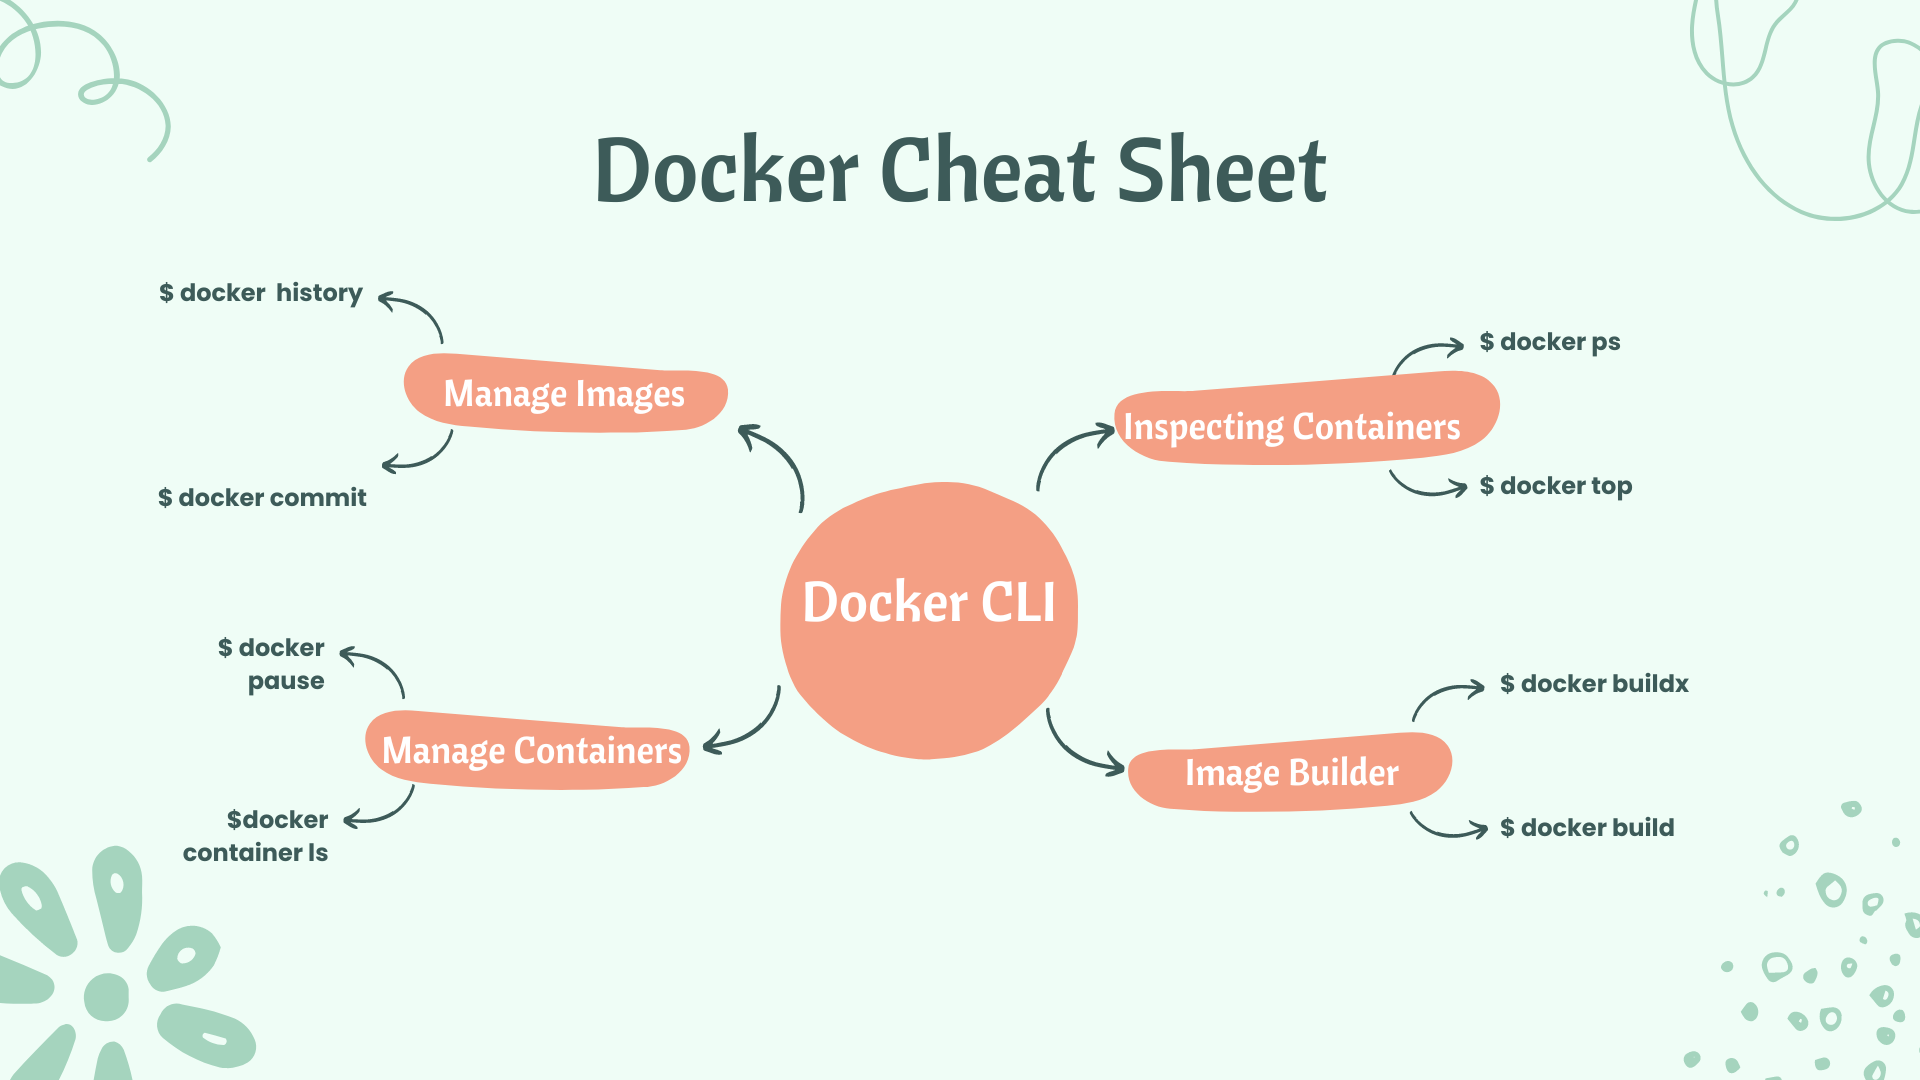

Table of Contents
Categories
🐳 Basic Docker CLIs
🧰 Container Management CLIs
🧑‍💻 Inspecting the Container
🧑‍💻 Interacting with Container
🫙 Image Management Commands
🧪 Image Transfer Commands
🏗️ Builder Main Commands
⚙️ The Docker CLI
🧰 Docker Security
🧑‍🤝‍🧑 Contributors
💬 Support and Community
👉 References

## Basic Docker CLIs
Here’s the list of the basic Docker commands that works on both Docker Desktop as well as Docker Engine:
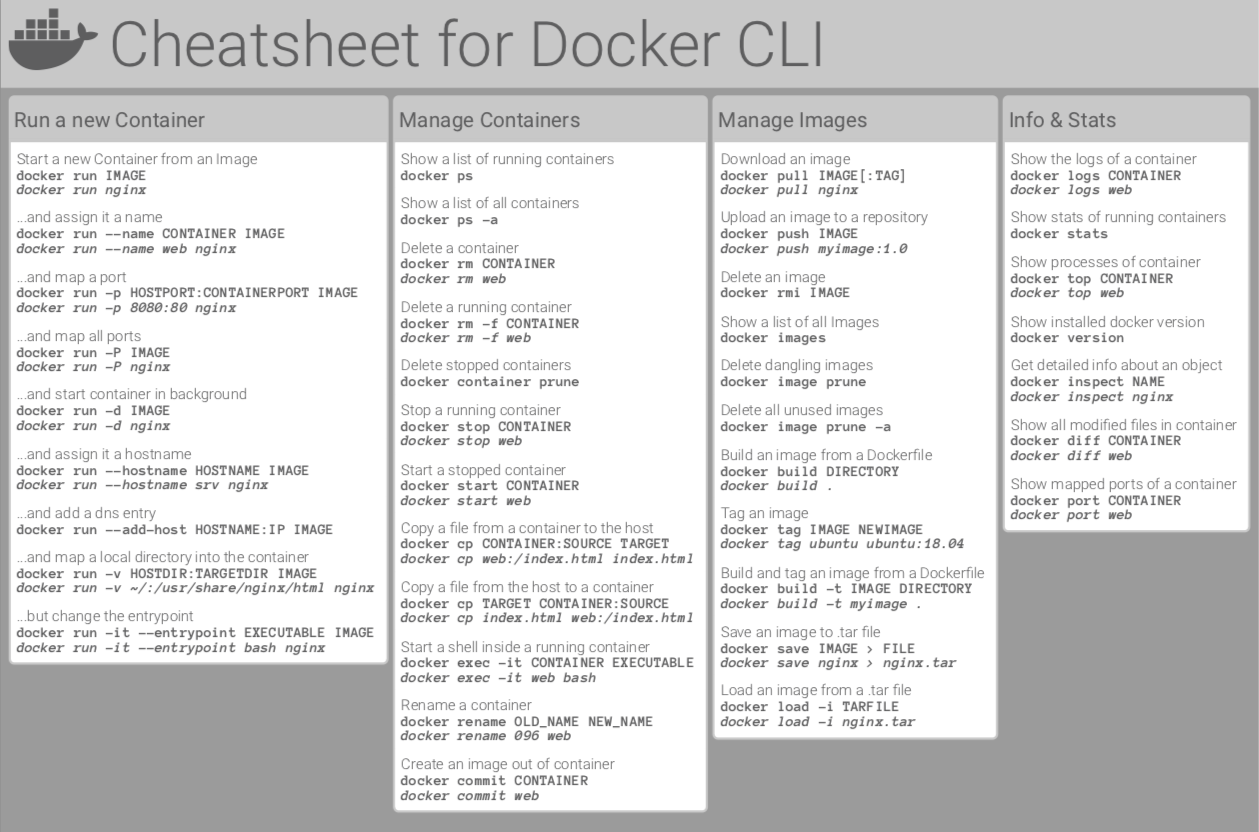

## Container Management CLIs
Here’s the list of the Docker commands that manages Docker images and containers flawlessly:
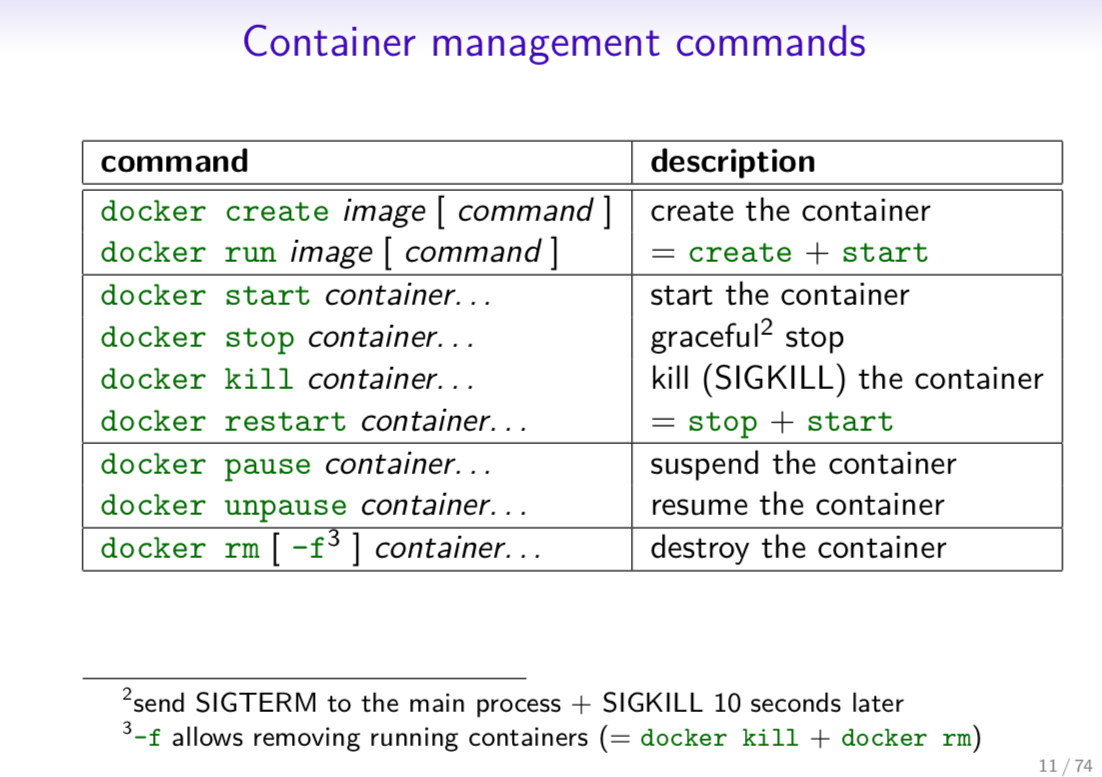

## Inspecting The Container
Here’s the list of the basic Docker commands that helps you inspect the containers seamlessly:
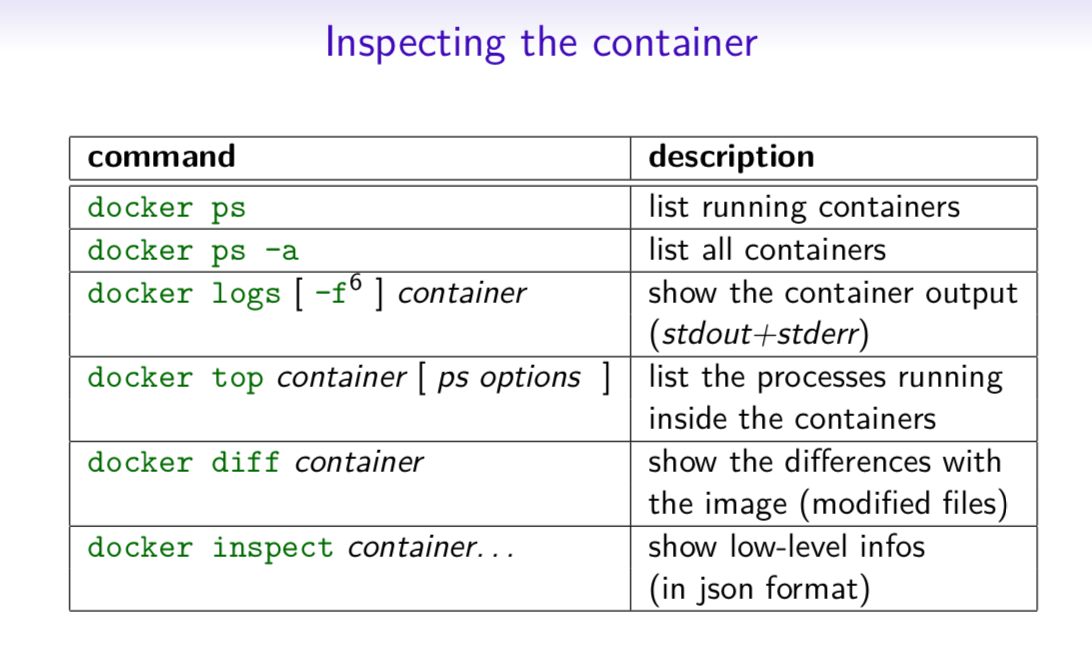

## Interacting with Container
Do you want to know how to access the containers? Check out these fundamental commands:
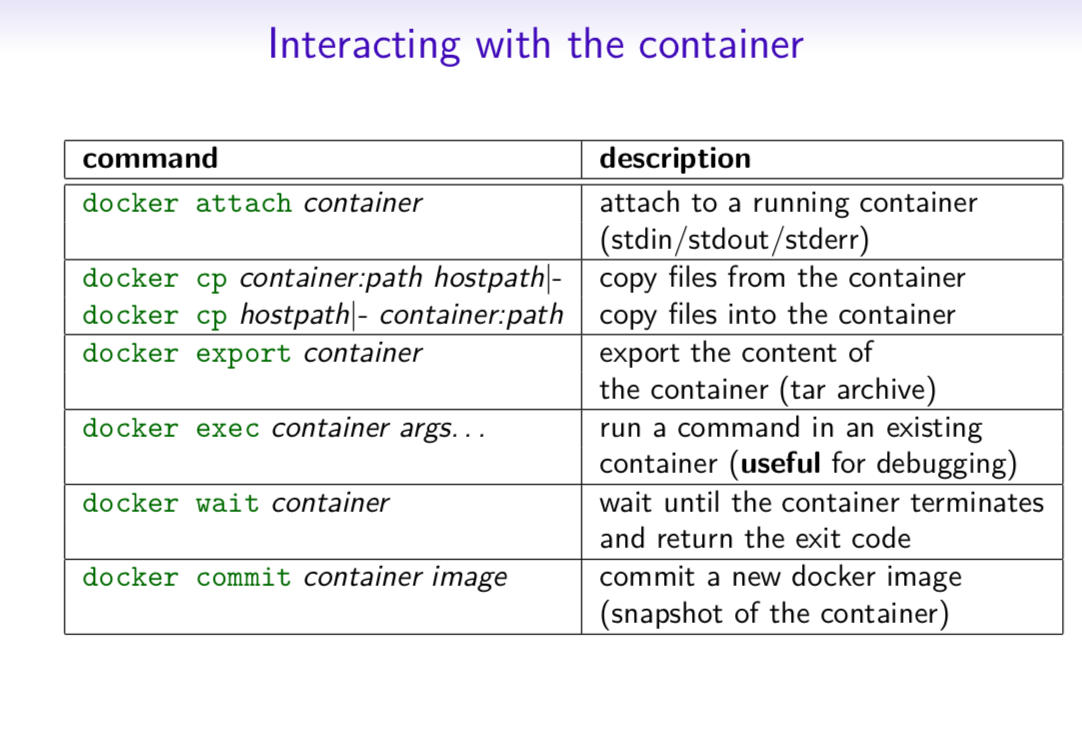

## Image Management Commands
Here’s the list of Docker commands that helps you manage the Docker Images:
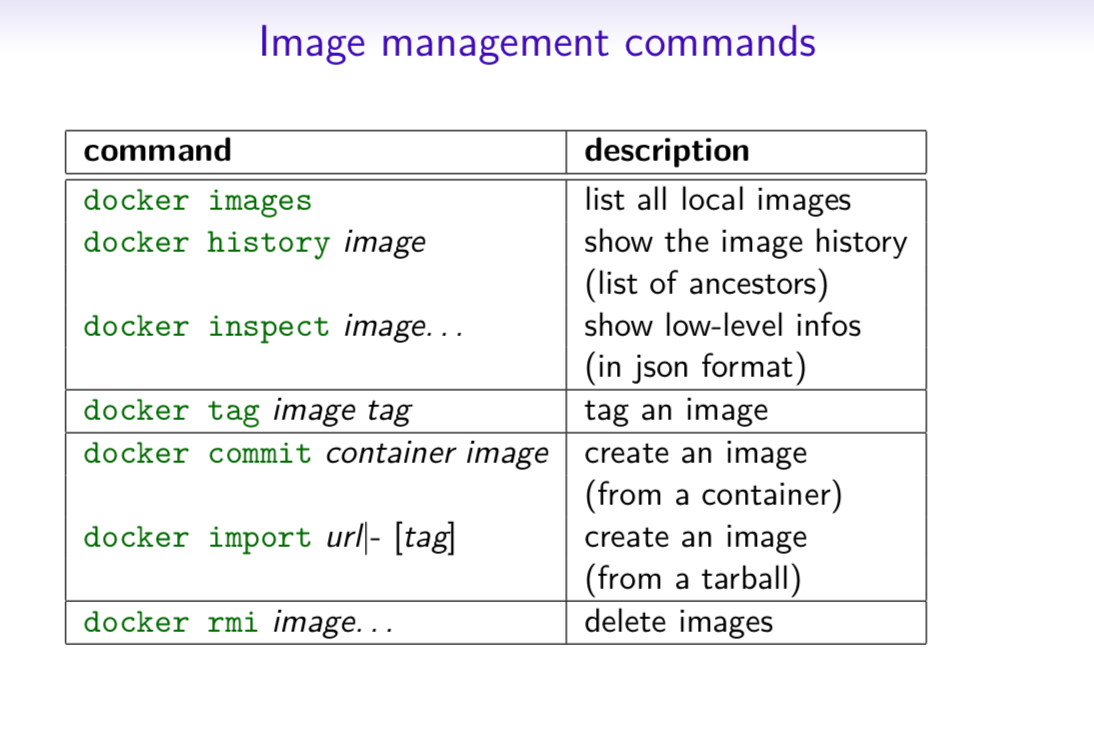

## Image Transfer Commands
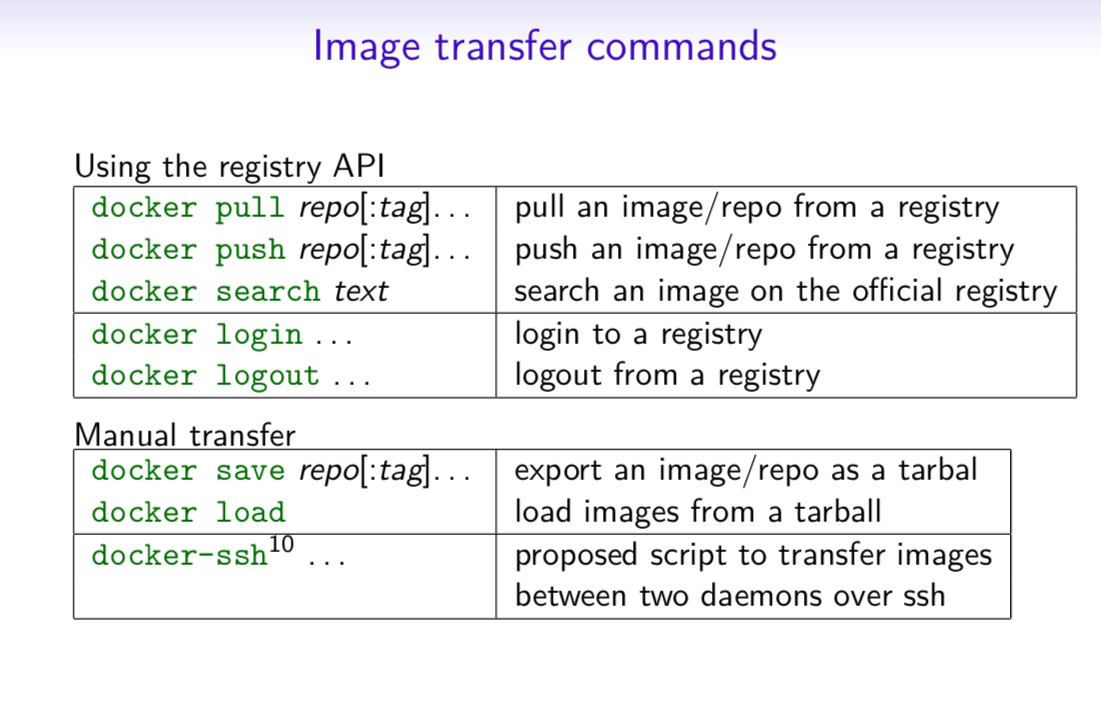

## Builder Main Commands
Want to know how to build Docker Image? Do check out the list of Image Build Commands:
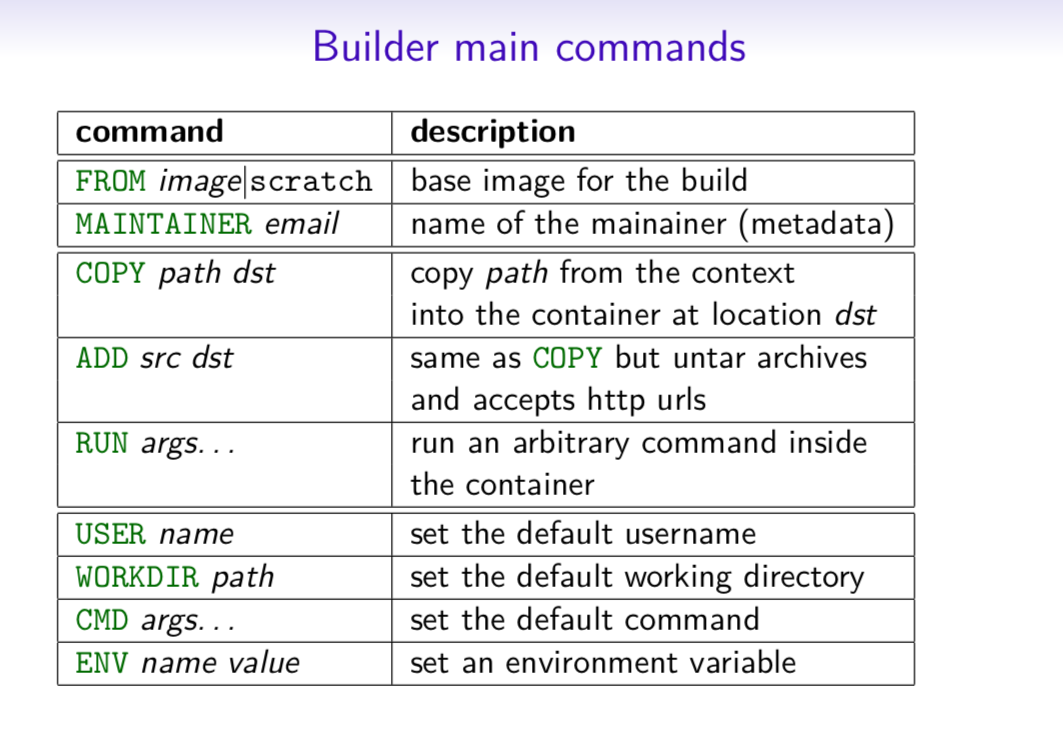

Builder Main Commands

The Docker CLI
Manage images


docker build


docker build [options] .
  -t "app/container_name"    # name
Create an image from a Dockerfile.

docker run


docker run [options] IMAGE
  # see `docker create` for options
Run a command in an image.

Manage containers


docker create


docker create [options] IMAGE
  -a, --attach               # attach stdout/err
  -i, --interactive          # attach stdin (interactive)
  -t, --tty                  # pseudo-tty
      --name NAME            # name your image
  -p, --publish 5000:5000    # port map
      --expose 5432          # expose a port to linked containers
  -P, --publish-all          # publish all ports
      --link container:alias # linking
  -v, --volume `pwd`:/app    # mount (absolute paths needed)
  -e, --env NAME=hello       # env vars
Example


$ docker create --name app_redis_1 \
  --expose 6379 \
  redis:3.0.2
Create a container from an image.

docker exec


docker exec [options] CONTAINER COMMAND
  -d, --detach        # run in background
  -i, --interactive   # stdin
  -t, --tty           # interactive
Example
$ docker exec app_web_1 tail logs/development.log
$ docker exec -t -i app_web_1 rails c
Run commands in a container.

docker start
docker start [options] CONTAINER
  -a, --attach        # attach stdout/err
  -i, --interactive   # attach stdin

docker stop [options] CONTAINER
Start/stop a container.

docker ps
$ docker ps
$ docker ps -a
$ docker kill $ID
Manage containers using ps/kill.

Images
docker images
$ docker images
  REPOSITORY   TAG        ID
  ubuntu       12.10      b750fe78269d
  me/myapp     latest     7b2431a8d968
$ docker images -a   # also show intermediate
Manages images.

docker rmi
docker rmi b750fe78269d
Deletes images.

Also see
Getting Started (docker.io)
Dockerfile
Inheritance
FROM ruby:2.2.2
Variables
ENV APP_HOME /myapp
RUN mkdir $APP_HOME
Initialization
RUN bundle install
WORKDIR /myapp
VOLUME ["/data"]
# Specification for mount point
ADD file.xyz /file.xyz
COPY --chown=user:group host_file.xyz /path/container_file.xyz
Onbuild
ONBUILD RUN bundle install
# when used with another file
Commands
EXPOSE 5900
CMD    ["bundle", "exec", "rails", "server"]
Entrypoint
ENTRYPOINT ["executable", "param1", "param2"]
ENTRYPOINT command param1 param2
Configures a container that will run as an executable.

ENTRYPOINT exec top -b
This will use shell processing to substitute shell variables, and will ignore any CMD or docker run command line arguments.

Metadata
LABEL version="1.0"
LABEL "com.example.vendor"="ACME Incorporated"
LABEL com.example.label-with-value="foo"
LABEL description="This text illustrates \
that label-values can span multiple lines."
See also
https://docs.docker.com/engine/reference/builder/
docker-compose
Basic example
# docker-compose.yml
version: '2'

services:
  web:
    build: .
    # build from Dockerfile
    context: ./Path
    dockerfile: Dockerfile
    ports:
     - "5000:5000"
    volumes:
     - .:/code
  redis:
    image: redis
Commands
docker-compose start
docker-compose stop
docker-compose pause
docker-compose unpause
docker-compose ps
docker-compose up
docker-compose down
Reference
Building
web:
  # build from Dockerfile
  build: .
  # build from custom Dockerfile
  build:
    context: ./dir
    dockerfile: Dockerfile.dev
  # build from image
  image: ubuntu
  image: ubuntu:14.04
  image: tutum/influxdb
  image: example-registry:4000/postgresql
  image: a4bc65fd
Ports
  ports:
    - "3000"
    - "8000:80"  # guest:host
  # expose ports to linked services (not to host)
  expose: ["3000"]
Commands
  # command to execute
  command: bundle exec thin -p 3000
  command: [bundle, exec, thin, -p, 3000]
  # override the entrypoint
  entrypoint: /app/start.sh
  entrypoint: [php, -d, vendor/bin/phpunit]
Environment variables
  # environment vars
  environment:
    RACK_ENV: development
  environment:
    - RACK_ENV=development
  # environment vars from file
  env_file: .env
  env_file: [.env, .development.env]
Dependencies
  # makes the `db` service available as the hostname `database`
  # (implies depends_on)
  links:
    - db:database
    - redis
  # make sure `db` is alive before starting
  depends_on:
    - db
Other options
  # make this service extend another
  extends:
    file: common.yml  # optional
    service: webapp
  volumes:
    - /var/lib/mysql
    - ./_data:/var/lib/mysql
Advanced features
Labels
services:
  web:
    labels:
      com.example.description: "Accounting web app"
DNS servers
services:
  web:
    dns: 8.8.8.8
    dns:
      - 8.8.8.8
      - 8.8.4.4
Devices
services:
  web:
    devices:
    - "/dev/ttyUSB0:/dev/ttyUSB0"
External links
services:
  web:
    external_links:
      - redis_1
      - project_db_1:mysql
Hosts
services:
  web:
    extra_hosts:
      - "somehost:192.168.1.100"
sevices
To view list of all the services runnning in swarm

docker service ls 

To see all running services

docker stack services stack_name
to see all services logs

docker service logs stack_name service_name 
To scale services quickly across qualified node

docker service scale stack_name_service_name=replicas
clean up
To clean or prune unused (dangling) images

docker image prune 
To remove all images which are not in use containers , add - a

docker image prune -a 
To prune your entire system

docker system prune 
To leave swarm

docker swarm leave  
To remove swarm ( deletes all volume data and database info)

docker stack rm stack_name  
To kill all running containers

docker kill $(docekr ps -q ) 
Docker Security
Docker Scout
Command line tool for Docker Scout:

docker scout
Analyzes a software artifact for vulnerabilities

docker scout cves [OPTIONS] IMAGE|DIRECTORY|ARCHIVE
Display vulnerabilities from a docker save tarball

 docker save redis > redis.tar
Display vulnerabilities from an OCI directory

skopeo copy --override-os linux docker://alpine oci:redis
Export vulnerabilities to a SARIF JSON file

docker scout cves --format sarif --output redis.sarif.json redis
Comparing two images

docker scout compare --to redis:6.0 redis:6-bullseye
Displaying the Quick Overview of an Image

docker scout quickview redis:6.0